# Loan Prediction

### Analytics Vidhya- Hackathon

**Author : Abir Chatterjee**

Date : 16-05-2021

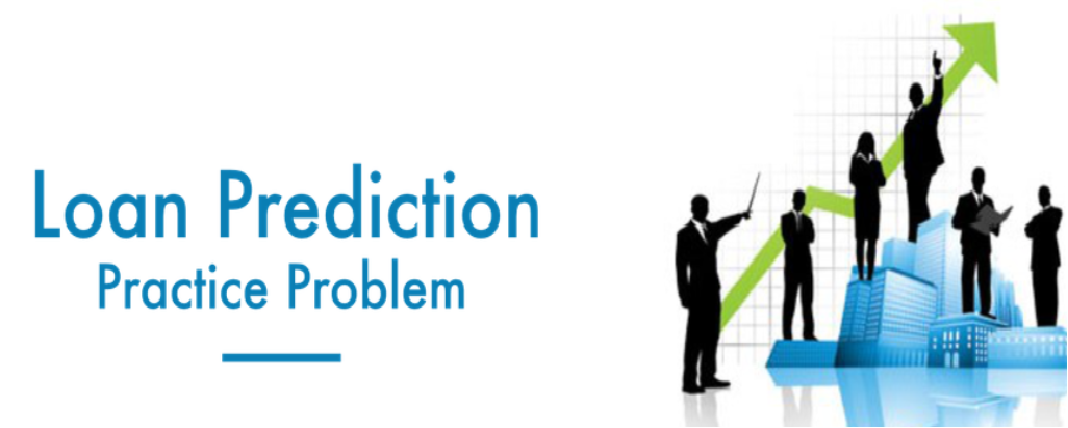

In [1]:
# Setting up the environment..
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import statsmodels.api as sm
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
# Reading the datasets..
train = pd.read_csv("C:/Users/Abir/Desktop/IVY- Data Analysis/Hackathon/Loan Prediction/train_ctrUa4K.csv")
test = pd.read_csv("C:/Users/Abir/Desktop/IVY- Data Analysis/Hackathon/Loan Prediction/test_lAUu6dG.csv")

In [3]:
train_original= train.copy()
test_original = test.copy()

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

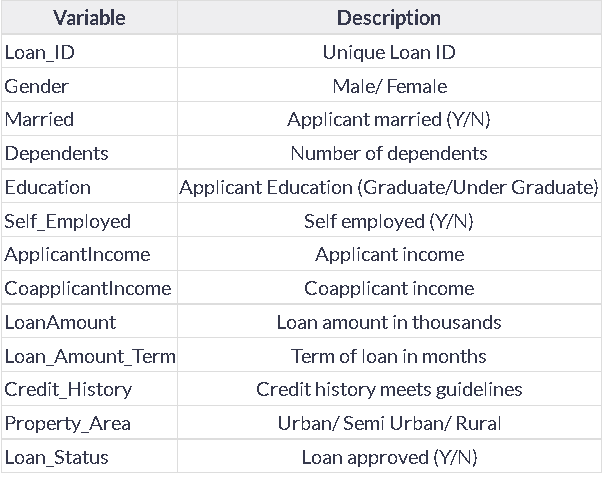

In [5]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
train.shape, test.shape

((614, 13), (367, 12))

Let us have a look at the target variable 'Loan Status'.

In [7]:
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

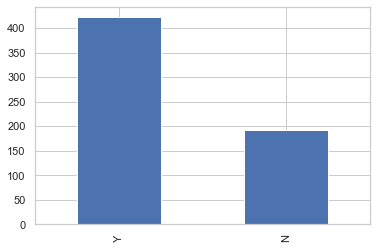

In [8]:
train["Loan_Status"].value_counts(normalize=True)
train["Loan_Status"].value_counts().plot.bar()

Loan of around 69% out of 614 have been approved.

Now, let us visualise each variables seperately. Different types of Variables are Categorical, Ordinal or Numeric.

In [108]:
plt.figure(figsize = (10, 5))

<Figure size 720x360 with 0 Axes>

<Figure size 720x360 with 0 Axes>

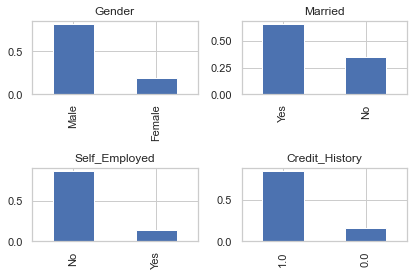

In [9]:
## Now let us visualise categorical variables....
plt.figure(1)
plt.subplot(2,2,1)
train["Gender"].value_counts(normalize=True).plot.bar(title ='Gender')
plt.subplot(2,2,2)
train["Married"].value_counts(normalize=True).plot.bar(title ='Married')
plt.subplot(2,2,3)
train["Self_Employed"].value_counts(normalize=True).plot.bar(title ='Self_Employed')
plt.subplot(2,2,4)
train["Credit_History"].value_counts(normalize=True).plot.bar(title ='Credit_History')
plt.tight_layout()
plt.show()

It can be inferred that:-
- 80% of the applicants are Male.
- 65% of the applicants are Married.
- 15% of the applicants are Self-employed.
- Around 85% of the applicants have repaid their debts.

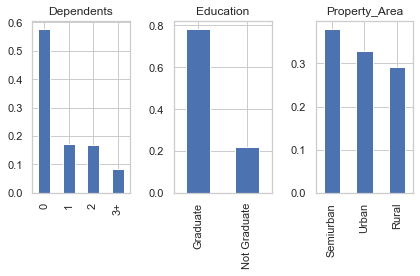

In [10]:
plt.figure(1)
plt.subplot(1,3,1)
train["Dependents"].value_counts(normalize=True).plot.bar(title ='Dependents')
plt.subplot(1,3,2)
train["Education"].value_counts(normalize=True).plot.bar(title ='Education')
plt.subplot(1,3,3)
train["Property_Area"].value_counts(normalize=True).plot.bar(title ='Property_Area')
plt.tight_layout()
plt.show()

It is seen that :-
- Most of the applicants dont have any dependents.
- Around 80% of the applicants are Graduates.
- Majority of the applicants are from the Semi-urban area.

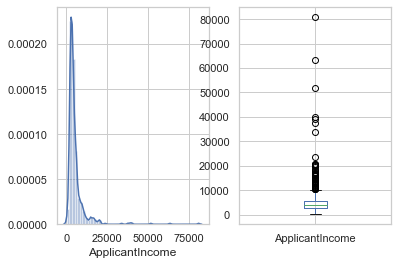

In [11]:
# Now lets look at the Numeriacal Variables.........
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train["ApplicantIncome"]) #Distribution Plot (distribution is not normal)
plt.subplot(1,2,2)
train["ApplicantIncome"].plot.box() # boxplot confirms presence of outliers and exteme values

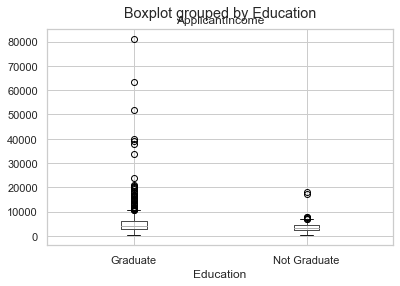

In [12]:
#Looking at income education wise
train.boxplot(column='ApplicantIncome', by= 'Education')

There are a high number of Graduates from very high incomes which are appearing as outliers.

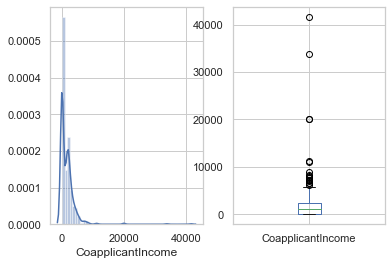

In [13]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train["CoapplicantIncome"]) #Distribution Plot (distribution is not normal)
plt.subplot(1,2,2)
train["CoapplicantIncome"].plot.box()

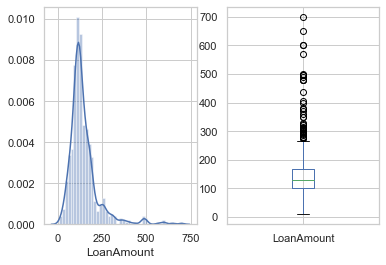

In [14]:
plt.figure(1)
plt.subplot(1,2,1)
sns.distplot(train["LoanAmount"]) #Distribution Plot (distribution is not normal)
plt.subplot(1,2,2)
train["LoanAmount"].plot.box()

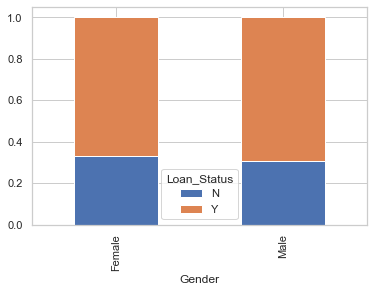

In [15]:
# Bivariate Analysis.
Gender = pd.crosstab(train['Gender'], train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)

Proportion of male and female applicants are more or less the same for both approved and unapproved loans.

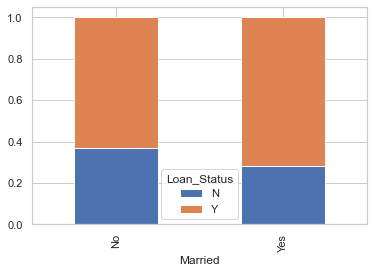

In [16]:
Married = pd.crosstab(train['Married'], train['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)

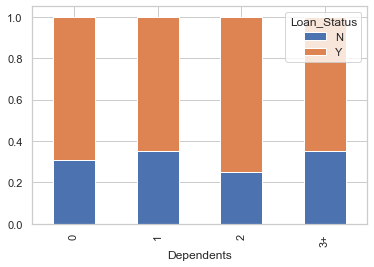

In [17]:
Dependents = pd.crosstab(train['Dependents'], train['Loan_Status'])
Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)

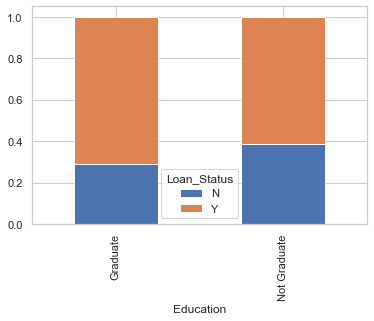

In [18]:
Education = pd.crosstab(train['Education'], train['Loan_Status'])
Education.div(Education.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)

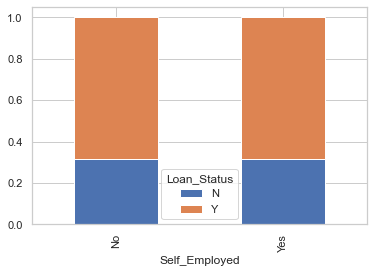

In [19]:
Self_Employed = pd.crosstab(train['Self_Employed'], train['Loan_Status'])
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)

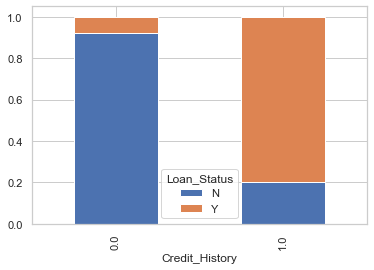

In [20]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)

It seems like peple with credit history are more likely to get their loan approved.

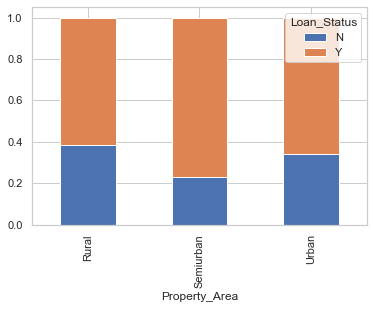

In [21]:
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)

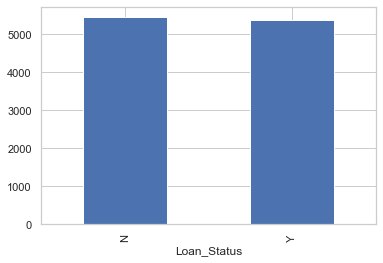

In [22]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [23]:
bins= [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Income_bin']= pd.cut(train['ApplicantIncome'],bins,labels=group)

Text(0, 0.5, 'Percentage')

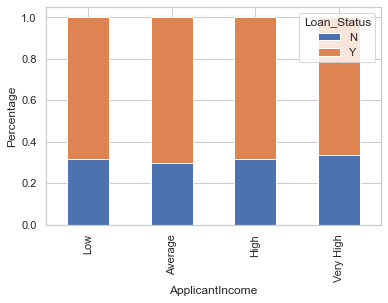

In [24]:
Income_bin = pd.crosstab(train['Income_bin'], train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)
plt.xlabel('ApplicantIncome')
plt.ylabel('Percentage')

Surprisingly, Applicant Income does not affect the chances of loan approval.

In [25]:
bins= [0,1000,3000,42000]
group = ['Low','Average','High']
train['Coapplicant_Income_bin']= pd.cut(train['CoapplicantIncome'],bins,labels=group)

Text(0, 0.5, 'Percentage')

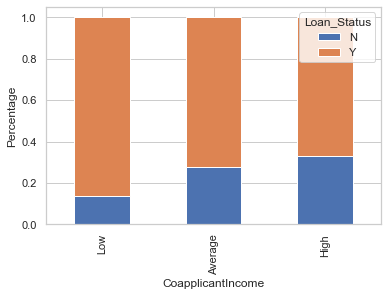

In [26]:
Coapplicant_Income_bin = pd.crosstab(train['Coapplicant_Income_bin'], train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

In [27]:
train['Total_Income']= train['ApplicantIncome']+train['CoapplicantIncome']

In [28]:
bins= [0,2500,4000,6000,81000]
group = ['Low','Average','High','Very High']
train['Total_Income_bin']= pd.cut(train['Total_Income'],bins,labels=group)

Text(0, 0.5, 'Percentage')

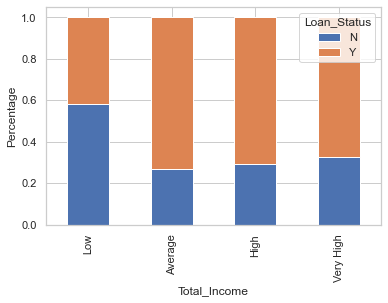

In [29]:
Total_Income_bin = pd.crosstab(train['Total_Income_bin'], train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)
plt.xlabel('Total_Income')
plt.ylabel('Percentage')

In [30]:
bins= [0,100,200,700]
group = ['Low','Average','High']
train['LoanAmount_bin']= pd.cut(train['LoanAmount'],bins,labels=group)

Text(0, 0.5, 'Percentage')

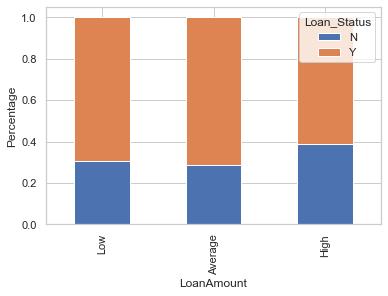

In [31]:
LoanAmount_bin = pd.crosstab(train['LoanAmount_bin'], train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind= "bar",stacked= True)
plt.xlabel('LoanAmount')
plt.ylabel('Percentage')

In [32]:
train= train.drop(['Income_bin','Coapplicant_Income_bin','Total_Income','Total_Income_bin','LoanAmount_bin'],axis=1)

In [33]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [35]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Loan_Status'])
train['Loan_Status'] = labelEncoder.transform(train['Loan_Status'])

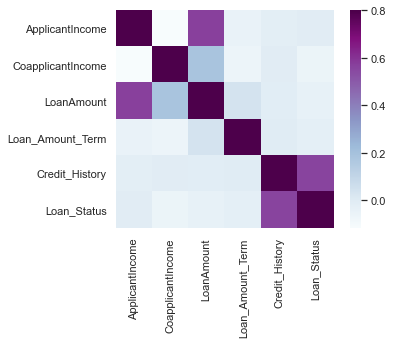

In [36]:
matrix= train.corr() 
sns.heatmap(matrix,vmax=.8,square=True,cmap="BuPu");

In [37]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [38]:
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)

In [39]:
train['Loan_Amount_Term'].value_counts()
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [40]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [41]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [42]:
test['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
test['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)
test['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

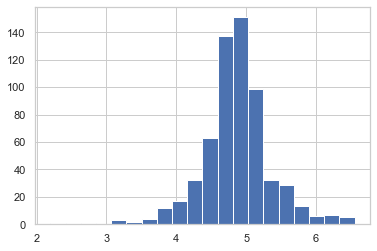

In [17]:
train['LoanAmount_log']= np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins=20)

In [43]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [44]:
# We build the model using Logistic Regression
train= train.drop('Loan_ID',axis=1)
test= test.drop('Loan_ID',axis=1)

In [45]:
X = train.drop('Loan_Status',1)
y = train['Loan_Status']

In [46]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [47]:
X=pd.get_dummies(X)
x_train,x_cv,y_train,y_cv = train_test_split(X,y, test_size=0.3)
train=  pd.get_dummies(train)
test=  pd.get_dummies(test)

The dataset has been divided into train and validation part.

In [48]:
model= LogisticRegression(solver = 'liblinear')
model.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [49]:
pred_cv= model.predict(x_cv)

In [50]:
accuracy_score(y_cv,pred_cv)

0.8

In [51]:
model.score(x_cv, y_cv)

0.8

In [52]:
pred_test=  model.predict(test)

In [53]:
submission= pd.DataFrame()
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status']= pred_test

In [54]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [55]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [56]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [57]:
from sklearn.model_selection import StratifiedKFold

In [58]:
folds = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

In [59]:
scores_logistic = []

In [60]:
for train_index, test_index in folds.split(X,y):
    X_train, X_test, y_train, y_test = X.iloc[train_index], X.iloc[test_index], \
                                       y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train,y_train)
    pred_test=  model.predict(X_test)
    score= accuracy_score(y_test,pred_test)
    scores_logistic.append(score)

In [61]:
scores_logistic

[0.8130081300813008,
 0.8373983739837398,
 0.7967479674796748,
 0.8211382113821138,
 0.7868852459016393]

In [62]:
np.average(scores_logistic)

0.8110355857656938

In [63]:
pred_test=  model.predict(test)

In [64]:
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status']= pred_test

In [65]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1


In [66]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [50]:
pd.DataFrame(submission,columns= ['Loan_ID','Loan_Status']).to_csv('submission_2.csv')

In [67]:
train['Total_Income']= train['ApplicantIncome']+train['CoapplicantIncome']
test['Total_Income']= test['ApplicantIncome']+test['CoapplicantIncome']

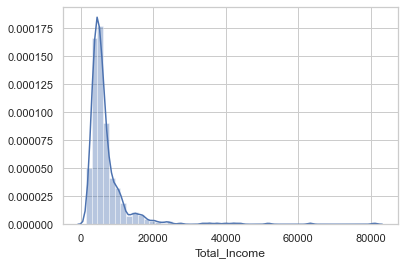

In [68]:
sns.distplot(train['Total_Income'])

In [69]:
train['Total_Income_log']= np.log(train['Total_Income'])
test['Total_Income_log']= np.log(test['Total_Income'])

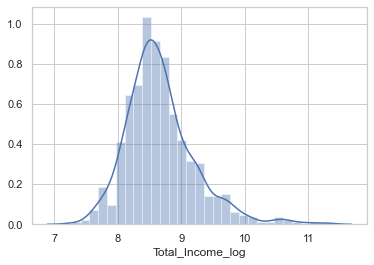

In [70]:
sns.distplot(train['Total_Income_log'])

In [71]:
train['EMI']= train['LoanAmount']/train['Loan_Amount_Term']
test['EMI']= test['LoanAmount']/test['Loan_Amount_Term']

In [72]:
train['Balance Income']= train['Total_Income']-(train['EMI']*1000)
test['Balance Income']= test['Total_Income']-(test['EMI']*1000)

In [73]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,...,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Total_Income,Total_Income_log,EMI,Balance Income
0,5849,0.0,128.0,360.0,1.0,1,0,1,1,0,...,0,1,0,0,0,1,5849.0,8.674026,0.355556,5493.444444
1,4583,1508.0,128.0,360.0,1.0,0,0,1,0,1,...,0,1,0,1,0,0,6091.0,8.714568,0.355556,5735.444444
2,3000,0.0,66.0,360.0,1.0,1,0,1,0,1,...,0,0,1,0,0,1,3000.0,8.006368,0.183333,2816.666667
3,2583,2358.0,120.0,360.0,1.0,1,0,1,0,1,...,1,1,0,0,0,1,4941.0,8.505323,0.333333,4607.666667
4,6000,0.0,141.0,360.0,1.0,1,0,1,1,0,...,0,1,0,0,0,1,6000.0,8.699515,0.391667,5608.333333


In [74]:
train= train.drop(['Total_Income'], axis=1)
test= test.drop(['Total_Income'], axis=1)

In [75]:
train= train.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)
test= test.drop(['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term'], axis=1)

In [76]:
X = train.drop('Loan_Status',1)
y = train['Loan_Status']

In [77]:
scores_logistic = []
scores_dt = []
scores_rf = []

In [78]:
folds = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

In [79]:
for train_index, test_index in folds.split(X,y):
    xtr, xvl, ytr, yvl = X.iloc[train_index], X.iloc[test_index], \
                                       y.iloc[train_index], y.iloc[test_index]
    model = LogisticRegression(random_state=1, solver = 'liblinear')
    model.fit(xtr,ytr)
    pred_test=  model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    scores_logistic.append(score)

In [80]:
scores_logistic

[0.8130081300813008,
 0.8373983739837398,
 0.7886178861788617,
 0.8048780487804879,
 0.7868852459016393]

In [81]:
np.average(scores_logistic)

0.806157536985206

In [82]:
from sklearn import tree

In [83]:
folds = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

In [84]:
for train_index, test_index in folds.split(X,y):
    xtr, xvl, ytr, yvl = X.iloc[train_index], X.iloc[test_index], \
                                       y.iloc[train_index], y.iloc[test_index]
    model = tree.DecisionTreeClassifier(random_state=1)
    model.fit(xtr,ytr)
    pred_test=  model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    scores_dt.append(score)

In [85]:
np.average(scores_dt)

0.6872051179528189

In [86]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
folds = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

In [88]:
for train_index, test_index in folds.split(X,y):
    xtr, xvl, ytr, yvl = X.iloc[train_index], X.iloc[test_index], \
                                       y.iloc[train_index], y.iloc[test_index]
    model = RandomForestClassifier(random_state=1,max_depth=10)
    model.fit(xtr,ytr)
    pred_test=  model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    scores_rf.append(score)

In [89]:
scores_rf

[0.8292682926829268,
 0.7967479674796748,
 0.7967479674796748,
 0.8048780487804879,
 0.7540983606557377]

In [90]:
np.average(scores_rf)

0.7963481274157004

In [91]:
from sklearn.model_selection import GridSearchCV

In [92]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

In [93]:
clf = GridSearchCV(LogisticRegression(random_state=1), param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

In [94]:
x_train,x_cv,y_train,y_cv = train_test_split(X,y, test_size=0.3)

In [95]:
best_clf = clf.fit(x_train,y_train)

Fitting 3 folds for each of 1280 candidates, totalling 3840 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   14.2s
[Parallel(n_jobs=-1)]: Done 756 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 1128 tasks      | elapsed:   44.9s
[Parallel(n_jobs=-1)]: Done 1882 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2592 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3556 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 3840 out of 3840 | elapsed:  2.7min finished


In [96]:
best_clf.best_estimator_

LogisticRegression(C=0.23357214690901212, penalty='l1', random_state=1,
                   solver='liblinear')

In [97]:
model = LogisticRegression(C=0.23357214690901212, penalty='l1', random_state=1,
                   solver='liblinear')

In [98]:
folds = StratifiedKFold(n_splits=5,random_state=1, shuffle=True)

In [99]:
scores_logistic = []

In [100]:
for train_index, test_index in folds.split(X,y):
    xtr, xvl, ytr, yvl = X.iloc[train_index], X.iloc[test_index], \
                                       y.iloc[train_index], y.iloc[test_index]
    model.fit(xtr,ytr)
    pred_test=  model.predict(xvl)
    score= accuracy_score(yvl,pred_test)
    scores_logistic.append(score)

In [101]:
scores_logistic

[0.8130081300813008,
 0.8373983739837398,
 0.7804878048780488,
 0.8048780487804879,
 0.7950819672131147]

In [102]:
np.average(scores_logistic)

0.8061708649873383

In [103]:
pred_test=  model.predict(test)

In [104]:
submission['Loan_ID'] = test_original['Loan_ID']
submission['Loan_Status']= pred_test

In [105]:
submission['Loan_Status'].replace(0,'N',inplace=True)
submission['Loan_Status'].replace(1,'Y',inplace=True)

In [106]:
submission.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [107]:
pd.DataFrame(submission,columns= ['Loan_ID','Loan_Status']).to_csv('Logit_final.csv')